# 1. Setup

In [1]:
apikey = 'JXnaG65GDwKPWCBHR6uv6UwEv7Q611hBZ7p7aUrHIHCj7mMIEn2qjUhVpqVABiLa'
secret = 'y6RqYhfk0g3kz3Ey5GspRR7AKCWp5zzzKadlMMi6JbXKRgh4ktnm2lKu2jfbos7V'

In [2]:
!pip install python-binance pandas mplfinance

Defaulting to user installation because normal site-packages is not writeable
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 19.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

# 2. Authenticate

In [4]:
client = Client(apikey, secret)

# 3. Get Tickers

In [5]:
tickers = client.get_all_tickers()

In [6]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.03204000'},
 {'symbol': 'LTCBTC', 'price': '0.00091900'},
 {'symbol': 'BNBBTC', 'price': '0.00682900'},
 {'symbol': 'NEOBTC', 'price': '0.00005310'},
 {'symbol': 'QTUMETH', 'price': '0.00057500'},
 {'symbol': 'EOSETH', 'price': '0.00030670'},
 {'symbol': 'SNTETH', 'price': '0.00001700'},
 {'symbol': 'BNTETH', 'price': '0.00020260'},
 {'symbol': 'BCCBTC', 'price': '0.00000000'},
 {'symbol': 'GASBTC', 'price': '0.00002670'},
 {'symbol': 'BNBETH', 'price': '0.21320000'},
 {'symbol': 'BTCUSDT', 'price': '117800.00000000'},
 {'symbol': 'ETHUSDT', 'price': '3775.19000000'},
 {'symbol': 'HSRBTC', 'price': '0.00000000'},
 {'symbol': 'OAXETH', 'price': '0.00000000'},
 {'symbol': 'DNTETH', 'price': '0.00000000'},
 {'symbol': 'MCOETH', 'price': '0.00000000'},
 {'symbol': 'ICNETH', 'price': '0.00000000'},
 {'symbol': 'MCOBTC', 'price': '0.00000000'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00000000'},
 {'symbol': 'LRCBTC', '

In [7]:
tickers[1]['price']

'0.00091900'

In [8]:
ticker_df = pd.DataFrame(tickers)

In [9]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.03204000
1,LTCBTC,0.00091900
2,BNBBTC,0.00682900
3,NEOBTC,0.00005310
4,QTUMETH,0.00057500


In [10]:
ticker_df.tail()

,symbol,price
3189,TREEUSDC,0.47660000
3190,TREEBNB,0.00059460
3191,TREEFDUSD,0.47760000
3192,TREETRY,19.35000000
3193,A2ZUSDT,0.00512500


In [11]:
ticker_df.set_index('symbol', inplace=True)

In [12]:
float(ticker_df.loc['ETHBTC']['price'])

0.03204

# 4. Get Depth

In [13]:
depth = client.get_order_book(symbol='BTCUSDT')

In [14]:
depth

{'lastUpdateId': 73782038874,
 'bids': [['117780.01000000', '2.45722000'],
  ['117780.00000000', '0.02425000'],
  ['117779.99000000', '0.00434000'],
  ['117779.62000000', '0.00010000'],
  ['117779.61000000', '0.19952000'],
  ['117779.60000000', '0.28035000'],
  ['117779.00000000', '0.01707000'],
  ['117778.40000000', '0.00005000'],
  ['117778.36000000', '0.00005000'],
  ['117777.92000000', '0.00010000'],
  ['117777.91000000', '0.12614000'],
  ['117777.81000000', '0.00010000'],
  ['117777.80000000', '0.11218000'],
  ['117777.56000000', '0.00015000'],
  ['117776.81000000', '0.02002000'],
  ['117776.44000000', '0.00005000'],
  ['117776.30000000', '0.00015000'],
  ['117775.41000000', '0.00005000'],
  ['117774.92000000', '0.09475000'],
  ['117774.91000000', '0.00005000'],
  ['117774.81000000', '0.00005000'],
  ['117774.28000000', '0.30568000'],
  ['117774.23000000', '0.12705000'],
  ['117774.09000000', '0.00005000'],
  ['117774.07000000', '0.00021000'],
  ['117773.63000000', '0.11480000'],


In [15]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,117780.02000000,6.92056000
1,117781.68000000,0.00025000
2,117781.69000000,0.04277000
3,117781.70000000,0.00010000
4,117781.88000000,0.27090000


In [16]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

# 5. Get Historical Data

In [17]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [21]:
client.get_historical_klines??

Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str=None,
    end_str=None,
    limit=None,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Source:   
    def get_historical_klines(
        self,
        symbol,
        interval,
        start_str=None,
        end_str=None,
        limit=None,
        klines_type: HistoricalKlinesType = HistoricalKlinesType.SPOT,
    ):
        """Get Historical Klines from Binance

        :param symbol: Name of symbol pair e.g. BNBBTC
        :type symbol: str
        :param interval: Binance Kline interval
        :type interval: str
        :param start_str: optional - start date string in UTC format or timestamp in milliseconds
        :type start_str: str|int
        :param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
        :type end_str: str|int
        :param limit: Default 1000; max 1000.
        :

In [22]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [23]:
historical

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '0'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '0'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '0'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '0'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '0'],
 [1500422400000,
  '0.10773200',
  '0.10873200',
  '0.0842900

In [24]:
hist_df = pd.DataFrame(historical)

In [25]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0


In [26]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [27]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
2935,1753574400000,0.03173000,0.03249000,0.03166000,0.03243000,27883.22950000,1753660799999,897.62298638,103168,14730.40580000,474.26800482,0
2936,1753660800000,0.03243000,0.03302000,0.03196000,0.03216000,36469.98420000,1753747199999,1184.60696330,125639,21869.15730000,710.76322935,0
2937,1753747200000,0.03217000,0.03268000,0.03176000,0.03217000,27939.59990000,1753833599999,899.51534867,101024,14316.55640000,460.97150871,0
2938,1753833600000,0.03217000,0.03241000,0.03176000,0.03233000,25230.64870000,1753919999999,810.32825454,88818,14243.23000000,457.26913888,0
2939,1753920000000,0.03234000,0.03269000,0.03192000,0.03205000,15419.93630000,1754006399999,499.49472717,58810,7148.32090000,231.50876630,0


In [28]:
hist_df.shape

(2940, 12)

In [29]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

# 6. Preprocess Historical Data

In [30]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [31]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [32]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [33]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
2935,2025-07-27,0.03173,0.03249,0.03166,0.03243,27883.2295,2025-07-27 23:59:59.999000072,897.622986,103168,14730.4058,474.268005,0
2936,2025-07-28,0.03243,0.03302,0.03196,0.03216,36469.9842,2025-07-28 23:59:59.999000072,1184.606963,125639,21869.1573,710.763229,0
2937,2025-07-29,0.03217,0.03268,0.03176,0.03217,27939.5999,2025-07-29 23:59:59.999000072,899.515349,101024,14316.5564,460.971509,0
2938,2025-07-30,0.03217,0.03241,0.03176,0.03233,25230.6487,2025-07-30 23:59:59.999000072,810.328255,88818,14243.2300,457.269139,0
2939,2025-07-31,0.03234,0.03269,0.03192,0.03205,15419.9363,2025-07-31 23:59:59.999000072,499.494727,58810,7148.3209,231.508766,0


In [34]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [35]:
hist_df.describe()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,2940,2940.000000,2940.000000,2940.000000,2940.000000,2.940000e+03,2940,2940.000000,2.940000e+03,2940.000000,2940.000000
mean,2021-07-22 12:00:00.000000256,0.049089,0.050037,0.048092,0.049072,1.390516e+05,2021-07-23 11:59:31.187657472,5997.017017,1.710203e+05,69517.424268,2991.905033
min,2017-07-14 00:00:00,0.016415,0.016560,0.016150,0.016415,1.942057e+03,2017-07-14 23:59:59.999000072,106.304410,1.994000e+03,1076.405000,49.329479
25%,2019-07-18 18:00:00,0.030920,0.031481,0.030227,0.030916,4.123060e+04,2019-07-19 17:59:59.999000064,1966.896267,8.923350e+04,20182.290625,938.822324
50%,2021-07-22 12:00:00,0.050527,0.051663,0.049445,0.050475,1.032808e+05,2021-07-23 11:59:59.999000064,4867.735108,1.441125e+05,51195.193500,2445.480449
75%,2023-07-27 06:00:00,0.068019,0.069152,0.066870,0.068004,1.906482e+05,2023-07-28 05:59:59.999000064,8061.589246,2.154698e+05,95957.083750,4126.658978
max,2025-07-31 00:00:00,0.113075,0.123799,0.109343,0.113185,1.396957e+06,2025-07-31 23:59:59.999000072,56836.342035,1.201493e+06,701279.783000,28345.303271
std,NaN,0.020606,0.021020,0.020183,0.020600,1.339015e+05,NaN,5568.665439,1.262325e+05,67020.427935,2754.502375


In [36]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           2940 non-null   datetime64[ns]
 1   Open                2940 non-null   float64       
 2   High                2940 non-null   float64       
 3   Low                 2940 non-null   float64       
 4   Close               2940 non-null   float64       
 5   Volume              2940 non-null   float64       
 6   Close Time          2940 non-null   datetime64[ns]
 7   Quote Asset Volume  2940 non-null   float64       
 8   Number of Trades    2940 non-null   int64         
 9   TB Base Volume      2940 non-null   float64       
 10  TB Quote Volume     2940 non-null   float64       
 11  Ignore              2940 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 275.8+ KB


# 7. Viz

In [37]:
import mplfinance as mpf

In [38]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2025-04-23 23:59:59.999000072,2025-04-23,0.01880,0.01950,0.01873,0.01917,43447.5014,834.563750,131718,21966.1726,422.002163,0
2025-04-24 23:59:59.999000072,2025-04-24,0.01916,0.01926,0.01876,0.01884,20192.2992,383.125172,54826,9428.8294,178.854569,0
2025-04-25 23:59:59.999000072,2025-04-25,0.01883,0.01915,0.01869,0.01886,29937.4597,566.705607,70216,14669.1299,277.648276,0
2025-04-26 23:59:59.999000072,2025-04-26,0.01885,0.01943,0.01885,0.01924,21410.8051,409.113289,58234,10823.5705,206.904016,0
2025-04-27 23:59:59.999000072,2025-04-27,0.01925,0.01951,0.01903,0.01911,16320.8520,313.714548,54449,7759.5293,149.279382,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-07-27 23:59:59.999000072,2025-07-27,0.03173,0.03249,0.03166,0.03243,27883.2295,897.622986,103168,14730.4058,474.268005,0
2025-07-28 23:59:59.999000072,2025-07-28,0.03243,0.03302,0.03196,0.03216,36469.9842,1184.606963,125639,21869.1573,710.763229,0
2025-07-29 23:59:59.999000072,2025-07-29,0.03217,0.03268,0.03176,0.03217,27939.5999,899.515349,101024,14316.5564,460.971509,0


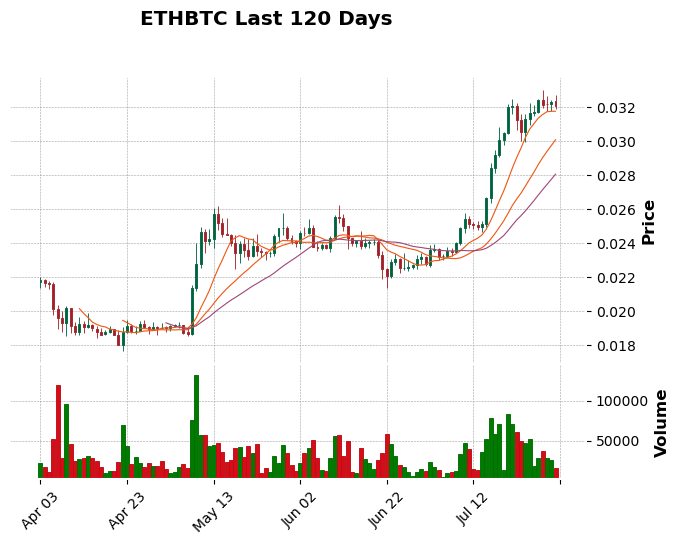

In [40]:
mpf.plot(hist_df.set_index('Close Time').tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHBTC Last 120 Days', 
        mav=(10,20,30))